In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe()

Dataset Shape: (891, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


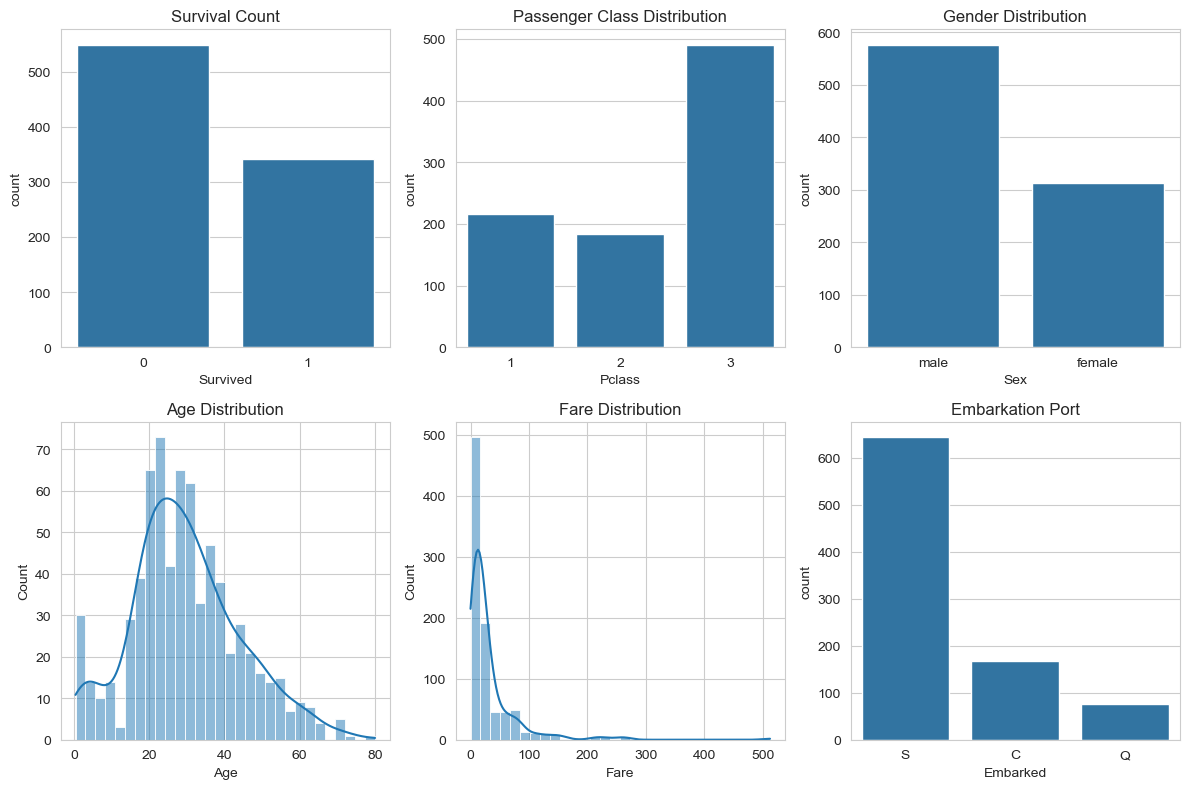

In [6]:
# Set up the visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 1. Survival count
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')

# 2. Passenger class distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Distribution')

# 3. Gender distribution
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')

# 4. Age distribution
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')

# 5. Fare distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')

# 6. Embarkation port
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Embarked')
plt.title('Embarkation Port')

plt.tight_layout()
plt.show()

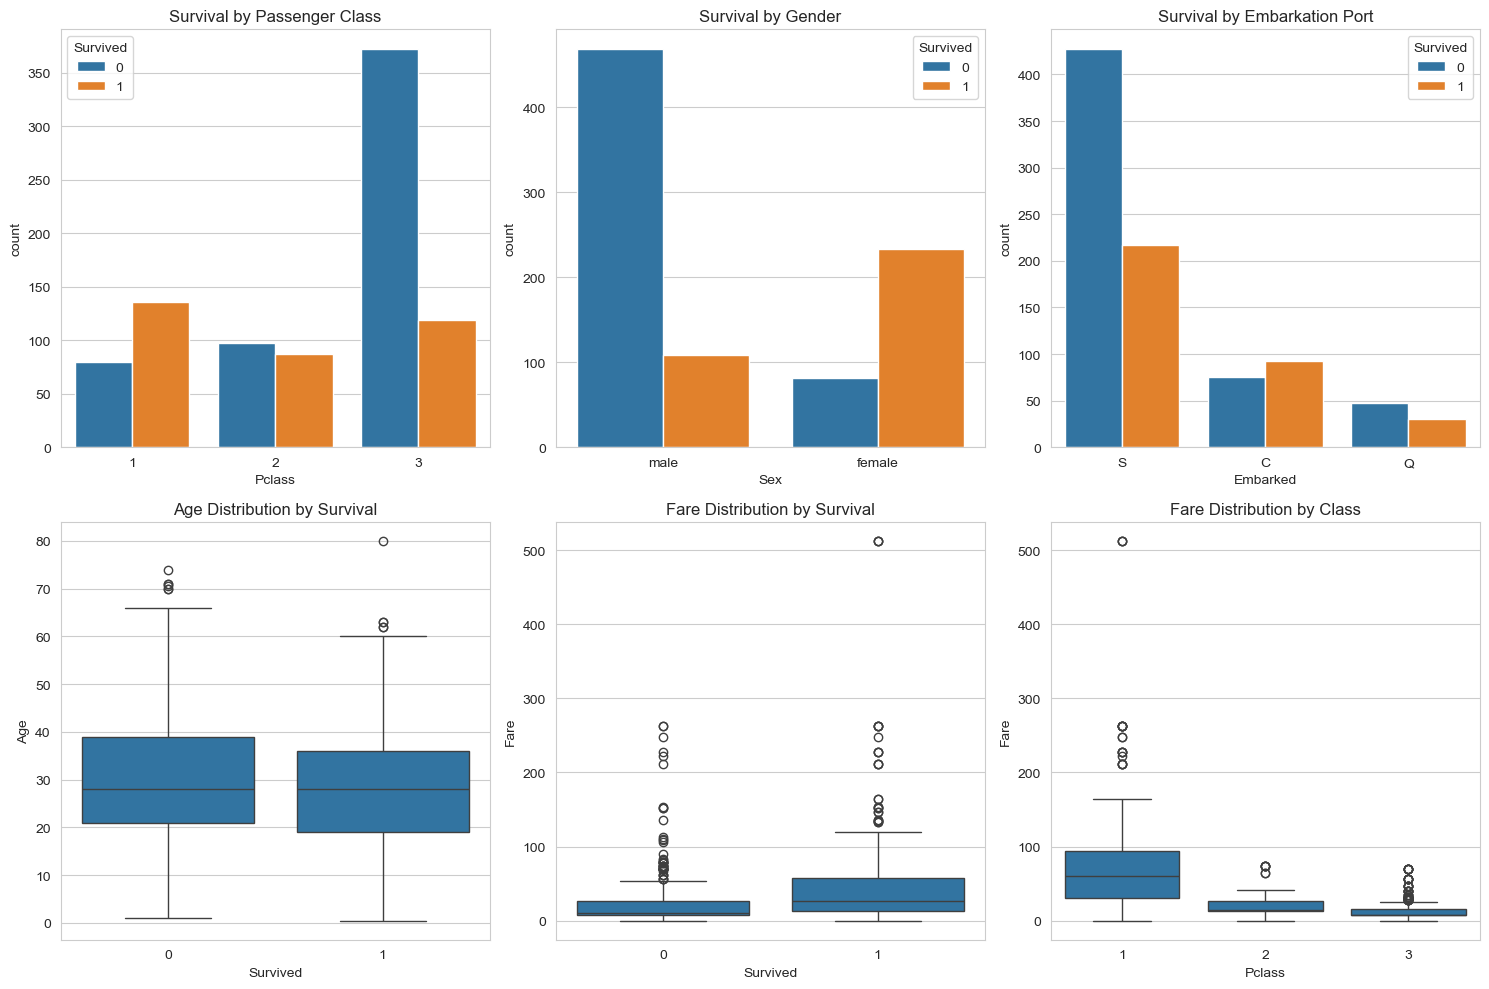

In [8]:
# Survival based on different factors
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Survival by Class
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival by Passenger Class')

# 2. Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Gender')

# 3. Survival by Embarkation Port
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[0,2])
axes[0,2].set_title('Survival by Embarkation Port')

# 4. Age vs Survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival')

# 5. Fare vs Survival
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Survival')

# 6. Fare vs Class
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axes[1,2])
axes[1,2].set_title('Fare Distribution by Class')

plt.tight_layout()
plt.show()

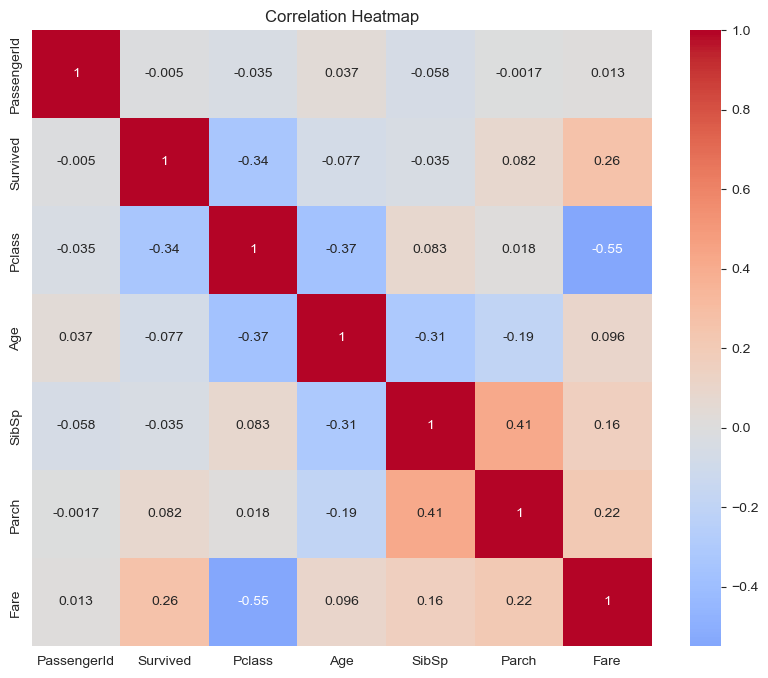

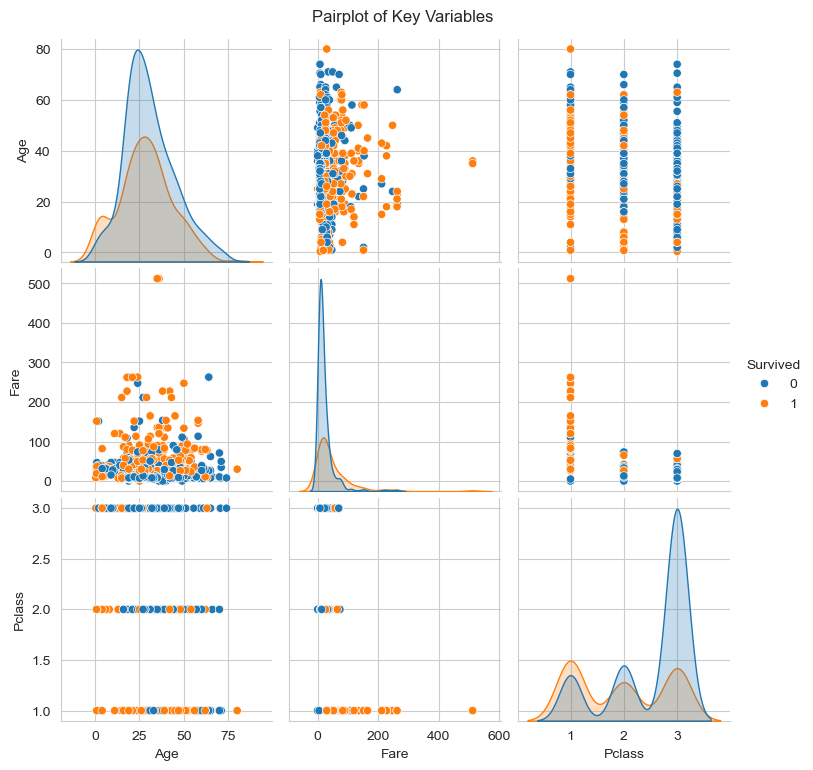

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()